In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv('melb_data.csv')

In [85]:
# df.dropna(inplace=True,how='all',axis=0)

In [86]:
# df.dropna(inplace=True,how='all',axis=1)

In [87]:
df.drop(['BuildingArea','YearBuilt','CouncilArea'],inplace=True,axis=1)

In [88]:
# df.dropna(inplace=True,axis=1)

In [89]:
df = df.query(" not Car.isna() ").copy()

In [90]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Rooms,13518.0,2.94,0.96,1.00,2.00,3.0,3.00,10.00
Price,13518.0,1074796.40,639858.56,85000.00,650000.00,901000.0,1328000.00,9000000.00
Distance,13518.0,10.16,5.86,0.00,6.20,9.2,13.00,48.10
Postcode,13518.0,3105.23,90.72,3000.00,3044.00,3084.0,3148.00,3977.00
Bedroom2,13518.0,2.92,0.97,0.00,2.00,3.0,3.00,20.00
Bathroom,13518.0,1.54,0.69,0.00,1.00,1.0,2.00,8.00
Car,13518.0,1.61,0.96,0.00,1.00,2.0,2.00,10.00
Landsize,13518.0,558.11,3998.19,0.00,178.00,442.5,651.00,433014.00
Lattitude,13518.0,-37.81,0.08,-38.18,-37.86,-37.8,-37.76,-37.41
Longtitude,13518.0,145.00,0.10,144.43,144.93,145.0,145.06,145.53


In [91]:
numerical_df = df.select_dtypes(include=['int16','int32','int64','float16','float32','float64'])

In [92]:
numerical_df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,-37.79960,144.99840,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,-37.80930,144.99440,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,-37.79690,144.99690,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,-37.90562,145.16761,7392.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,-37.85927,144.87904,6380.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,-37.85274,144.88738,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,-37.85908,144.89299,6380.0


In [93]:
numerical_df.drop(['Lattitude','Longtitude','Postcode'],axis=1,inplace=True)

In [94]:
pearson_corr = numerical_df.corr(method='pearson')

<function matplotlib.pyplot.show(close=None, block=None)>

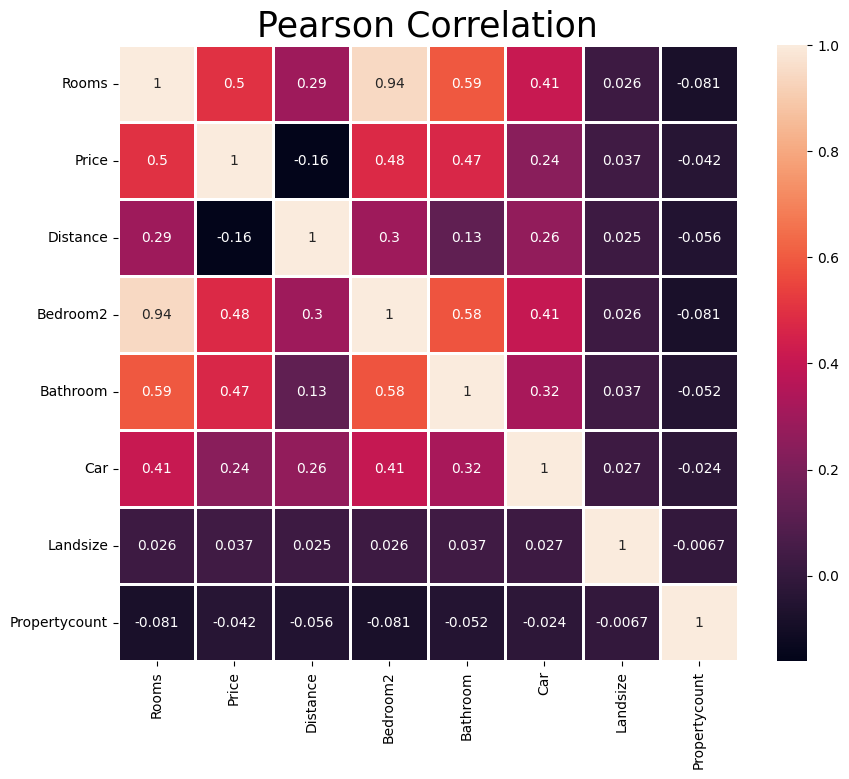

In [95]:
plt.figure(figsize=(10,8))

sns.heatmap(
    pearson_corr,
    linewidths=1,
    annot=True,
    annot_kws={'size':10}
)

plt.title('Pearson Correlation',fontsize=25)
plt.show

In [96]:
spearman_corr = numerical_df.corr(method='spearman')

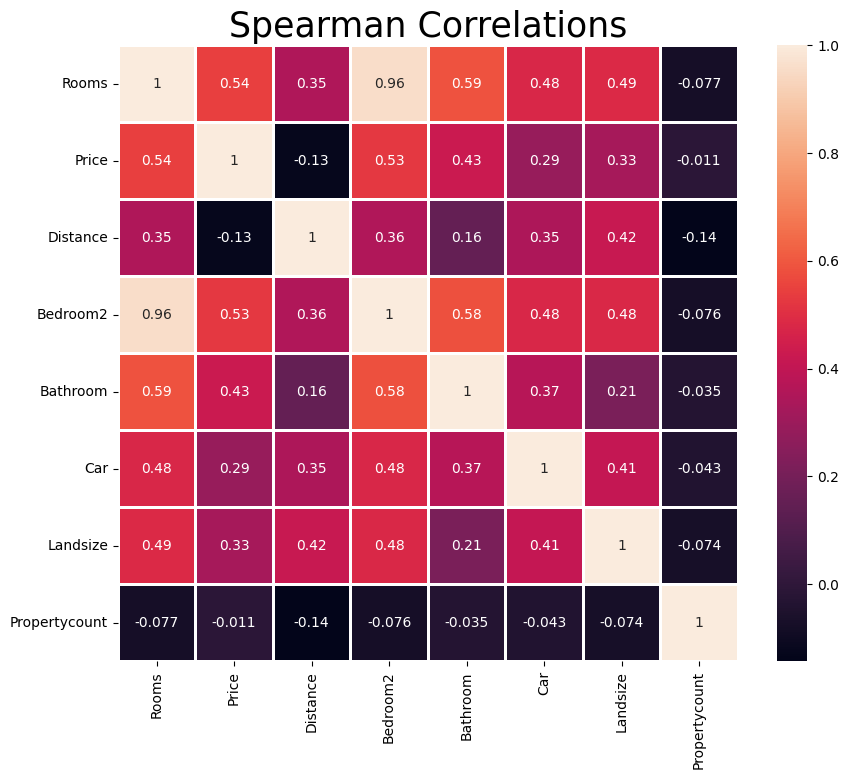

In [97]:
plt.figure(figsize=(10,8))

sns.heatmap(
    spearman_corr,
    linewidths=1,
    annot=True,
    annot_kws={'size':10}
)

plt.title('Spearman Correlations',fontsize=25)
plt.show()